In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Configurações para melhor visualização
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
uploaded = files.upload()
nome_arquivo_padrao = list(uploaded.keys())[0]

# Carrega os dados no DataFrame
# ATENÇÃO: Usamos sep=';' pois o Godot exporta nesse formato
df = pd.read_csv(io.BytesIO(uploaded[nome_arquivo_padrao]), sep=';')

print(f"Dados carregados do arquivo: {nome_arquivo_padrao}")
print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())


Saving dados_custo_a_star.csv to dados_custo_a_star (1).csv
Dados carregados do arquivo: dados_custo_a_star (1).csv

Primeiras 5 linhas do DataFrame:
   Agente_ID  Tempo_ms  Passos_Rota  Distancia_Reta  Origem_X  Origem_Y  \
0          1     1.305            7          8.0623         6         2   
1          2     2.708           13         13.1529         2         4   
2          3     0.983            7          7.6158        11         7   
3          1     0.229            5          5.0000         2         3   
4          2     0.273            5          5.0990         9         8   

   Destino_X  Destino_Y  
0         13          6  
1         15          2  
2          8          0  
3          2          8  
4          8          3  


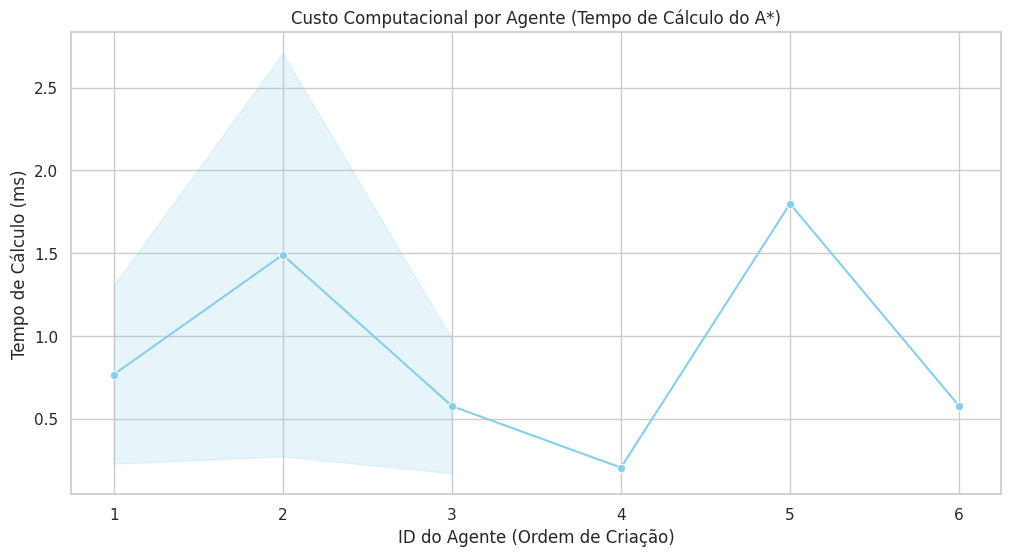

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Agente_ID', y='Tempo_ms', data=df, marker='o', color='skyblue')
plt.title('Custo Computacional por Agente (Tempo de Cálculo do A*)')
plt.xlabel('ID do Agente (Ordem de Criação)')
plt.ylabel('Tempo de Cálculo (ms)')
plt.grid(True)
plt.show()

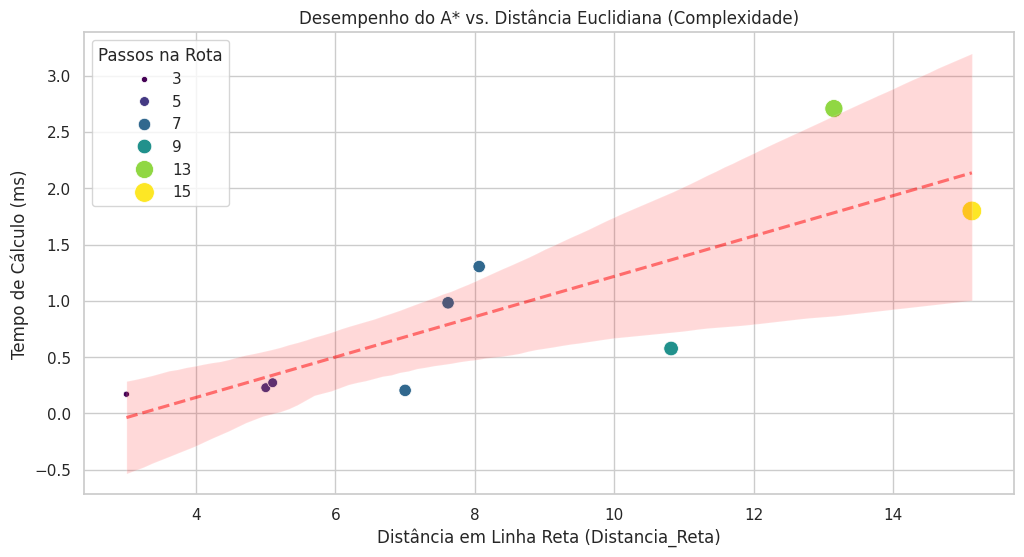

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distancia_Reta', y='Tempo_ms', data=df, hue='Passos_Rota', palette='viridis', size='Passos_Rota', sizes=(20, 200))

# Adiciona uma linha de tendência (opcional, mas útil)
sns.regplot(x='Distancia_Reta', y='Tempo_ms', data=df, scatter=False, color='red', line_kws={'linestyle': '--', 'alpha': 0.5})

plt.title('Desempenho do A* vs. Distância Euclidiana (Complexidade)')
plt.xlabel('Distância em Linha Reta (Distancia_Reta)')
plt.ylabel('Tempo de Cálculo (ms)')
plt.legend(title='Passos na Rota')
plt.show()

Por favor, carregue os arquivos 'dados_aberto.csv' e 'dados_labirinto.csv' (ou os nomes que você usou) no pop-up:


Saving dados_custo_a_star_obstaculos.csv to dados_custo_a_star_obstaculos.csv
Saving dados_custo_a_star_aberto.csv to dados_custo_a_star_aberto.csv


/tmp/ipython-input-1118417577.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cenario', y='Tempo_ms', data=media_custo, palette=['#4CAF50', '#FF5733'])


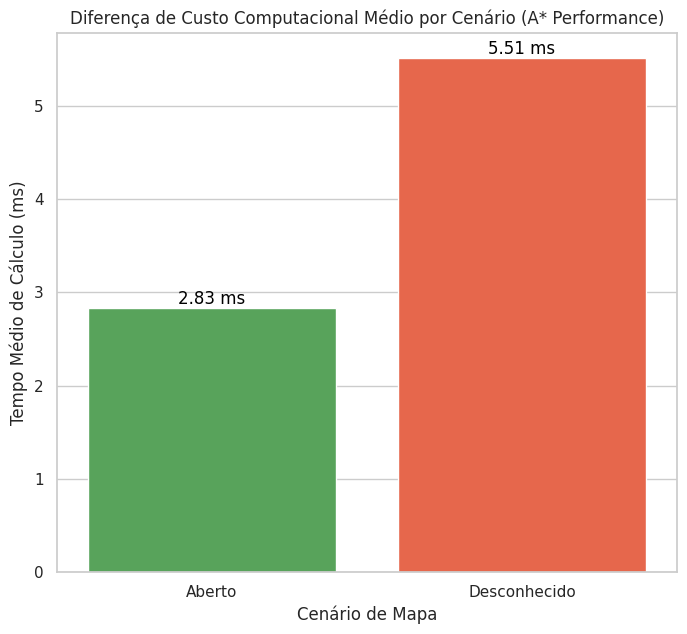

In [6]:
# --- Faça o upload dos dois arquivos CSV para este bloco ---
print("Por favor, carregue os arquivos 'dados_aberto.csv' e 'dados_labirinto.csv' (ou os nomes que você usou) no pop-up:")
uploaded_cenarios = files.upload()

# Carrega e processa os dados de cada cenário
df_list = []

for filename, data in uploaded_cenarios.items():
    df_temp = pd.read_csv(io.BytesIO(data), sep=';')
    # Extrai o nome do cenário baseado no nome do arquivo para rotular o gráfico
    scenario_name = "Aberto" if "aberto" in filename.lower() else ("Labirinto" if "labirinto" in filename.lower() else "Desconhecido")
    df_temp['Cenario'] = scenario_name
    df_list.append(df_temp)

if len(df_list) < 2:
    print("ERRO: Pelo menos dois arquivos CSV (aberto e labirinto) são necessários para a comparação.")
else:
    df_comparacao = pd.concat(df_list)

    # Calcula o tempo médio por cenário
    media_custo = df_comparacao.groupby('Cenario')['Tempo_ms'].mean().reset_index()

    plt.figure(figsize=(8, 7))
    sns.barplot(x='Cenario', y='Tempo_ms', data=media_custo, palette=['#4CAF50', '#FF5733'])

    # Adiciona os valores médios acima das barras
    for index, row in media_custo.iterrows():
        plt.text(row.name, row.Tempo_ms, f'{row.Tempo_ms:.2f} ms', color='black', ha="center", va="bottom", fontsize=12)

    plt.title('Diferença de Custo Computacional Médio por Cenário (A* Performance)')
    plt.xlabel('Cenário de Mapa')
    plt.ylabel('Tempo Médio de Cálculo (ms)')
    plt.show()